In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [78]:
col = ['No Shielding', '0.5mm Zn', '0.66cm Al', '1.33cm Al', '2cm Al', '1cm W', '2cm W', '3cm W']
source_1 = ['20230322-160452_pocket_geiger.csv', '20230322-161050_pocket_geiger.csv',\
            '20230322-161614_pocket_geiger.csv', '20230322-161845_pocket_geiger.csv',\
            '20230322-162101_pocket_geiger.csv', '20230322-162347_pocket_geiger.csv',\
            '20230322-162642_pocket_geiger.csv', '20230322-162951_pocket_geiger.csv']

source_2 = ['20230322-164008_pocket_geiger.csv', '20230322-164500_pocket_geiger.csv',\
            '20230322-165151_pocket_geiger.csv', '20230322-165418_pocket_geiger.csv',\
            '20230322-165713_pocket_geiger.csv', '20230322-164916_pocket_geiger.csv']

In [79]:
s1 = pd.DataFrame()
for i, ele in enumerate(source_1):
    df = pd.read_csv('CSV_FILES/' + ele)
    df.columns = [col[i]]
    s1 = pd.concat([s1, df], axis=1)
    
s2 = pd.DataFrame()
for i, ele in enumerate(source_2):
    df = pd.read_csv('CSV_FILES/' + ele)
    df.columns = [col[i]]
    s2 = pd.concat([s2, df], axis=1)

In [80]:
display(s1)
display(s2)

,No Shielding,0.5mm Zn,0.66cm Al,1.33cm Al,2cm Al,1cm W,2cm W,3cm W
0,31,14,5,3,4,1,2,1
1,30,8,3,2,0,2,1,0
2,33,8,5,2,4,4,2,0
3,35,8,3,3,3,3,1,2
4,27,11,5,6,2,0,2,0
5,43,8,1,6,2,0,0,1
6,25,9,3,6,3,3,2,1
7,42,5,4,1,1,3,0,1
8,36,11,4,3,4,0,5,1
9,29,5,2,5,0,3,1,0


,No Shielding,0.5mm Zn,0.66cm Al,1.33cm Al,2cm Al,1cm W
0,21,7,9,4,10,4
1,17,11,9,9,6,7
2,20,7,10,8,5,4
3,26,7,6,8,8,3
4,12,10,12,9,5,6
5,18,8,6,7,9,4
6,21,11,12,10,7,9
7,16,4,4,12,8,4
8,21,5,6,10,7,0
9,25,10,8,3,5,7


Text(0.5, 0, 'cpm')

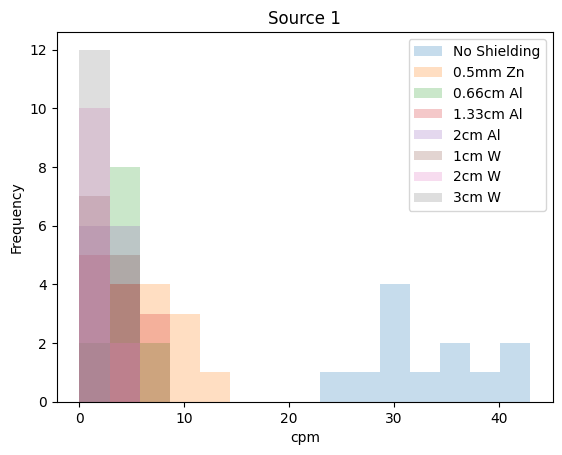

In [81]:
ax1 = s1.plot.hist(bins = 15, alpha = 1/4, title = "Source 1")
ax1.set_xlabel("cpm")

In [82]:
print("Source 1\n Means:\n", s1.mean())

Source 1
 Means:
 No Shielding    33.250000
0.5mm Zn         8.083333
0.66cm Al        4.000000
1.33cm Al        3.416667
2cm Al           2.333333
1cm W            1.833333
2cm W            1.583333
3cm W            0.666667
dtype: float64


In [138]:
print("Standard deviations:\n", s1.std(), \
"\nExpected uncertainties:\n", np.sqrt(s1.mean()))

Standard deviations:
 No Shielding    5.690902
0.5mm Zn        2.874918
0.66cm Al       1.705606
1.33cm Al       1.831955
2cm Al          1.556998
1cm W           1.403459
2cm W           1.443376
3cm W           0.651339
dtype: float64 
Expected uncertainties:
 No Shielding    5.766281
0.5mm Zn        2.843120
0.66cm Al       2.000000
1.33cm Al       1.848423
2cm Al          1.527525
1cm W           1.354006
2cm W           1.258306
3cm W           0.816497
dtype: float64


The measured $\sigma$ are in good agreement with the expected values $\sigma_{ideal} = N$. The counts roughly follow an exponential trend with thickness, as we know the theoretical behavior of radiation intensity is $I = I_0 e^{- \Sigma r}$.

In [116]:
s1_total_counts = s1.sum()
print(s1_total_counts)
Al_thicknesses = [0, 0.66, 1.33, 2]
W_thicknesses = [0, 1, 2, 3]

No Shielding    399
0.5mm Zn         97
0.66cm Al        48
1.33cm Al        41
2cm Al           28
1cm W            22
2cm W            19
3cm W             8
dtype: int64


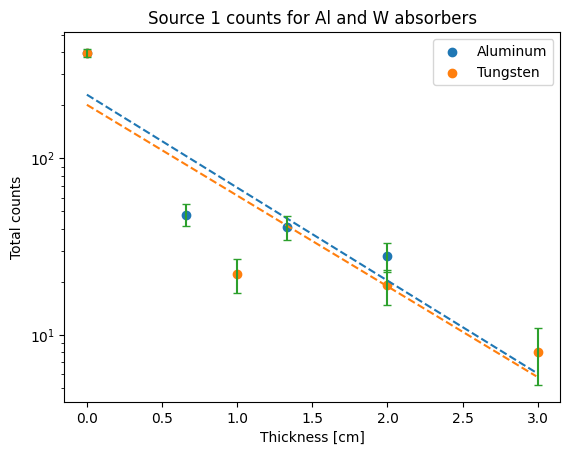

In [126]:
fig, ax = plt.subplots()
ax.scatter(Al_thicknesses, s1_total_counts[[0,2,3,4]], label = "Aluminum")
ax.scatter(W_thicknesses, s1_total_counts[[0,5,6,7]], label = "Tungsten")
m_Al_1, b_Al_1 = np.polyfit(Al_thicknesses, np.log10(s1_total_counts[[0,2,3,4]]), 1)
m_W_1, b_W_1 = np.polyfit(W_thicknesses, np.log10(s1_total_counts[[0,5,6,7]]),1)
x1 = np.arange(0,3,0.01)
ax.plot(x1, 10**(m_Al_1 * x1 + b_Al_1), ls = 'dashed')
ax.plot(x1, 10**(m_W_1 * x1 + b_W_1), ls = 'dashed')
plt.yscale('log')
plt.errorbar(Al_thicknesses + W_thicknesses[1:], s1_total_counts[[0,2,3,4,5,6,7]], \
    yerr = np.sqrt(s1_total_counts[[0,2,3,4,5,6,7]]), xerr = None, ls = 'none', capsize = 3.0)
plt.xlabel("Thickness [cm]")
plt.ylabel("Total counts")
plt.legend(loc = 'best')
plt.title("Source 1 counts for Al and W absorbers")
plt.show()

In [131]:
print("The absorption coefficients of Al and W are %.2f cm^-1 and %.2f cm^-1, respectively."\
    %(-m_Al_1, -m_W_1))

The absorption coefficients of Al and W are 0.53 cm^-1 and 0.52 cm^-1, respectively.


If we had more data points (i.e. more pieces of aluminum and tungsten pieces of varying thickness) we could get more precise absorption coefficients, as the regression isn't super tight as-is.

Text(0.5, 0, 'cpm')

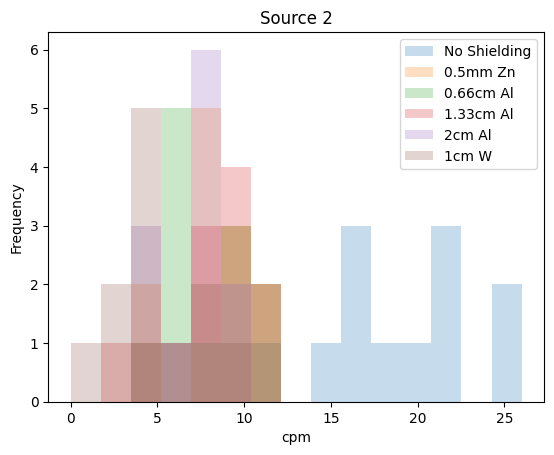

In [86]:
ax2 = s2.plot.hist(bins = 15, alpha = 1/4, title = "Source 2")
ax2.set_xlabel("cpm")

In [139]:
print("Source 2\n Means:\n", s2.mean())

Source 2
 Means:
 No Shielding    19.083333
0.5mm Zn         8.083333
0.66cm Al        7.833333
1.33cm Al        8.083333
2cm Al           7.083333
1cm W            4.666667
dtype: float64


In [140]:
print("Standard deviations:\n", s2.std(), \
"\nExpected uncertainties:\n", np.sqrt(s2.mean()))

Standard deviations:
 No Shielding    4.055486
0.5mm Zn        2.314316
0.66cm Al       2.587850
1.33cm Al       2.712206
2cm Al          1.621354
1cm W           2.348436
dtype: float64 
Expected uncertainties:
 No Shielding    4.368447
0.5mm Zn        2.843120
0.66cm Al       2.798809
1.33cm Al       2.843120
2cm Al          2.661453
1cm W           2.160247
dtype: float64


With the exception of the 2 cm Al shielding, the measured $\sigma$ are in pretty good agreement with the expected $\sigma_\text{ideal} = N$

In [134]:
W_thicknesses_2 = [0, 1]
s2_total_counts = s2.sum()
print(s2_total_counts)

No Shielding    229
0.5mm Zn         97
0.66cm Al        94
1.33cm Al        97
2cm Al           85
1cm W            56
dtype: int64


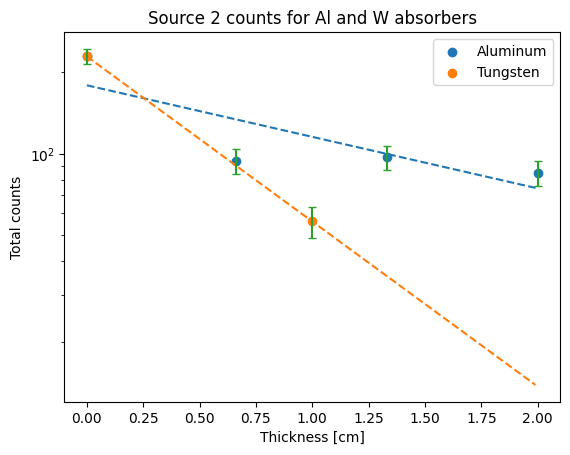

In [136]:
fig, ax = plt.subplots()
ax.scatter(Al_thicknesses, s2_total_counts[[0,2,3,4]], label = "Aluminum")
ax.scatter(W_thicknesses_2, s2_total_counts[[0,5]], label = "Tungsten")
m_Al_2, b_Al_2 = np.polyfit(Al_thicknesses, np.log10(s2_total_counts[[0,2,3,4]]), 1)
m_W_2, b_W_2 = np.polyfit(W_thicknesses_2, np.log10(s2_total_counts[[0,5]]),1)
x2 = np.arange(0,2,0.01)
ax.plot(x2, 10**(m_Al_2 * x2 + b_Al_2), ls = 'dashed')
ax.plot(x2, 10**(m_W_2 * x2 + b_W_2), ls = 'dashed')
plt.yscale('log')
plt.errorbar(Al_thicknesses + W_thicknesses_2[1:], s2_total_counts[[0,2,3,4,5]], \
    yerr = np.sqrt(s2_total_counts[[0,2,3,4,5]]), xerr = None, ls = 'none', capsize = 3.0)
plt.xlabel("Thickness [cm]")
plt.ylabel("Total counts")
plt.legend(loc = 'best')
plt.title("Source 2 counts for Al and W absorbers")
plt.show()

In [137]:
print("The absorption coefficients of Al and W are %.2f cm^-1 and %.2f cm^-1, respectively."\
    %(-m_Al_2, -m_W_2))

The absorption coefficients of Al and W are 0.19 cm^-1 and 0.61 cm^-1, respectively.


This disagrees significantly than the values we got from source 1. This is understandable, as we only had 2 data points for the tungsten absorber for source 2, one of which was with no absorber at all.